In [ ]:
# Part of Mercari assignments
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt 

path = "/content/gdrive/MyDrive/Mercari/Data/"
df_train = pd.read_csv(path+"mercari_train.csv")
df_train['log_price'] = df_train['price'].apply(lambda x: np.log(x+1))
df_test = pd.read_csv(path+"mercari_test.csv")

df_train.head()

,id,name,item_condition_id,category_name,brand_name,price,shipping,seller_id,item_description,log_price
0,17,"Hold Alyssa Frye Harness boots 12R, Sz 7",3,Women/Shoes/Boots,Frye,79,1,211140753,Good used condition Women's Fyre harness boots...,4.382027
1,19,Steve Madden booties,3,Women/Shoes/Boots,Steve Madden,31,0,3874531266,"The brand is actually ""Steven"" by Steve Madden...",3.465736
2,42,BCBG Tan Booties,1,Women/Shoes/Boots,NaN,48,0,8341537216,Brand new! Does not include the box.,3.891820
3,45,NWT Sorel Caribou boots size 8.5,1,Women/Shoes/Boots,NaN,85,0,4040379892,New in box. Size 8.5,4.454347
4,58,NIB Hunter Tiffany Mint Boots Size 5,1,Women/Shoes/Boots,Hunter,200,0,19216599,Brand new never worn only flaw is as you can s...,5.303305


# Missing Values

In [ ]:
df_train_missing = df_train.isna()
df_test_missing = df_test.isna()
print(" Train Data")
df_train_missing.sum()

 Train Data


id                       0
name                     0
item_condition_id        0
category_name            0
brand_name           21465
price                    0
shipping                 0
seller_id                0
item_description      6810
log_price                0
dtype: int64

In [ ]:
print(" Test Data")
df_test_missing.sum()

 Test Data


id                      0
name                    0
item_condition_id       0
category_name           0
brand_name           9895
shipping                0
seller_id               0
item_description     3070
dtype: int64

# Feature - [ Name ]

In [ ]:
print("List of all the names product names - \n")
df_train['name'].value_counts()

List of all the names product names - 



Bundle                             114
Lularoe TC leggings                 70
Dress                               60
Michael Kors Wallet                 53
Coach wallet                        52
                                  ... 
LuLaRoe sunflower TC leggings        1
Lularoe OS penguin Christmas         1
Earring Lot 21 Pc                    1
New Victoria's Secret bra            1
Black Levi's High Waited Shorts      1
Name: name, Length: 59282, dtype: int64

Analysis of multiple products & limited products 



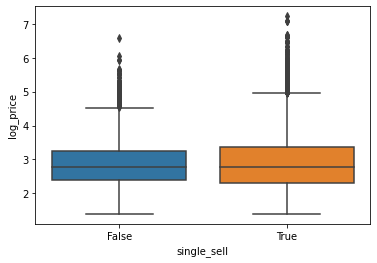

In [ ]:
df_train_name = df_train
seller_counts = df_train['name'].value_counts().to_dict()
df_train_name['single_sell'] = df_train['name'].apply(lambda x: seller_counts[x]==1)
print("Analysis of multiple products & limited products \n")
ax = sns.boxplot(x="single_sell", y="log_price", data=df_train_name)


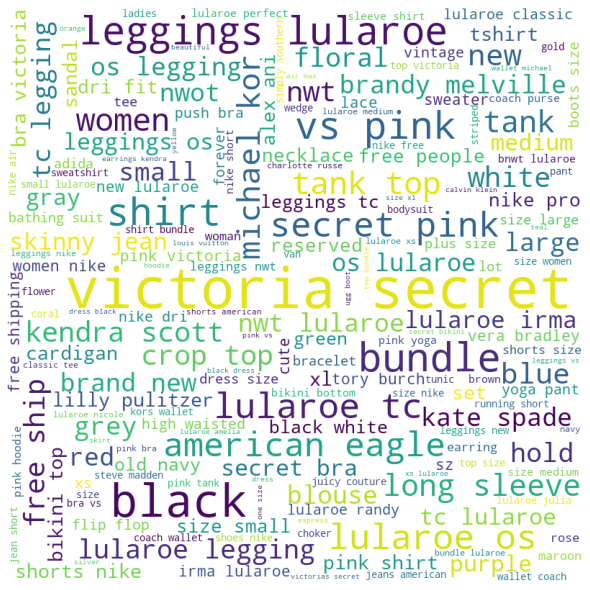

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in df_train_name.name:
    val = str(val) 
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    min_df = 5,
    ngram_range=(1,2),
    lowercase=True,
    stop_words = 'english',
    max_features=5000)
X = vectorizer.fit_transform(df_train_name.name)
X_freq = X.toarray().sum(axis=0).tolist()
features = vectorizer.get_feature_names_out().tolist()
record = {x: count  for count, x in zip(X_freq, features)}
record = {k: v for k, v in sorted(record.items(), key=lambda item: item[1], reverse=True)}

print("The 10 most frequent words in the training data")
print(list(record.items())[:10], "\n")

print("The 10 least frequent words in the training data")
print(list(record.items())[-10:])

The 10 most frequent words in the training data
[('lularoe', 8963), ('pink', 5581), ('leggings', 5468), ('size', 4522), ('dress', 4368), ('black', 3982), ('shirt', 3588), ('secret', 3484), ('victoria', 3427), ('nike', 3337)] 

The 10 least frequent words in the training data
[('yellow dress', 7), ('yoga mat', 7), ('yru', 7), ('zag', 7), ('zara black', 7), ('zara dress', 7), ('zebra print', 7), ('zig', 7), ('zig zag', 7), ('zip sweatshirt', 7)]


# Feature- [ item_condition_id ] 

Talks the about the condition of the item. "1" being newer and "5" being older.


In [ ]:
print("Count of item_condition_id in train \n")
print(df_train['item_condition_id'].value_counts(normalize=True, sort=False))

print("\nCount of item_condition_id in test \n")
print(df_test['item_condition_id'].value_counts(normalize=True, sort=False))

Count of item_condition_id in train 

1    0.269503
2    0.354532
3    0.351462
4    0.023816
5    0.000687
Name: item_condition_id, dtype: float64

Count of item_condition_id in test 

1    0.270251
2    0.353581
3    0.351757
4    0.023876
5    0.000535
Name: item_condition_id, dtype: float64


Analysis of product condition with selling price



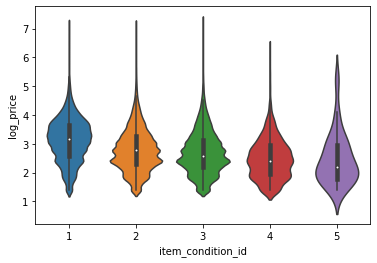

In [ ]:
print("Analysis of product condition with selling price\n")
ax = sns.violinplot(x="item_condition_id", y="log_price", data=df_train)



# Feature- [ category_name ] 

It is given in a format of `Women/pri_category/sec_category` for both train & test





In [ ]:
category_train_set = set(df_train['category_name'].value_counts().keys())
category_test_set = set(df_test['category_name'].value_counts().keys())

print(category_train_set.difference(category_test_set))
print(category_test_set.difference(category_train_set))

print("Empty shows that same categories exist in both train and test data.")

set()
set()
Empty shows that same categories exist in both train and test data.


In [ ]:
df_train['pri_category'] = df_train['category_name'].apply(lambda x: x.split('/')[1])
df_test['pri_category'] = df_test['category_name'].apply(lambda x: x.split('/')[1])

df_train['sec_category'] = df_train['category_name'].apply(lambda x: x.split('/')[2])
df_test['sec_category'] = df_test['category_name'].apply(lambda x: x.split('/')[2])

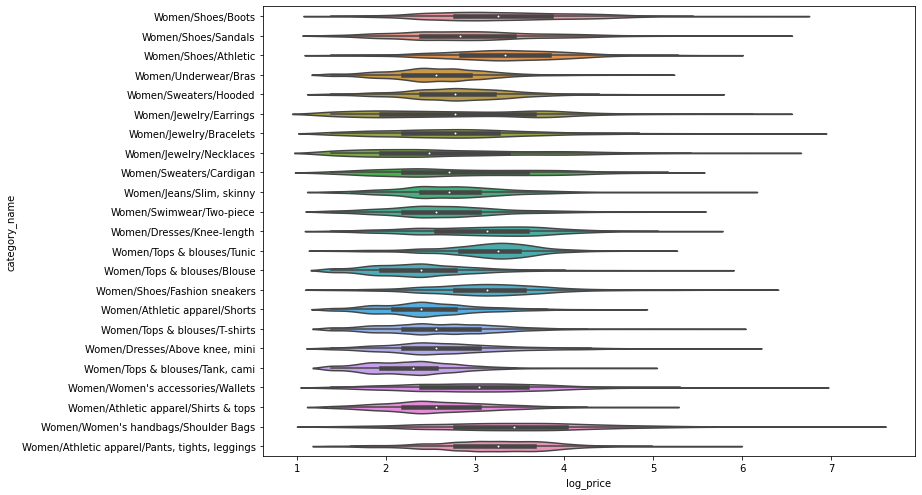

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="log_price", y="category_name", data=df_train, orient='h', height=10.27)


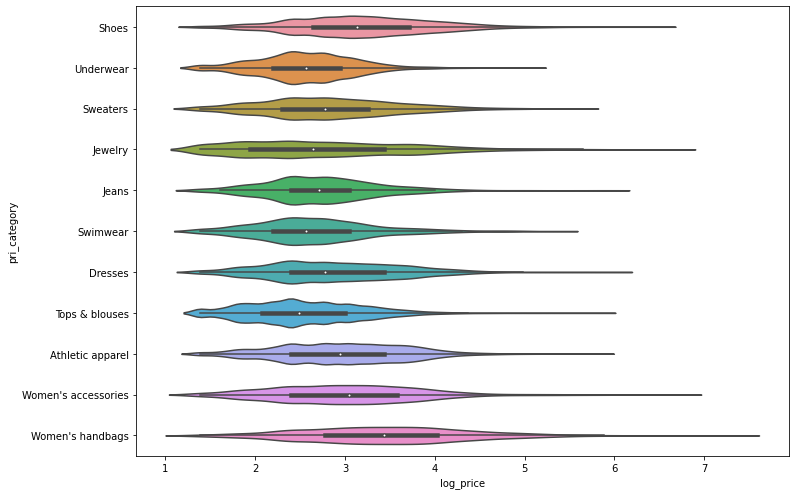

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="log_price", y="pri_category", data=df_train, orient='h', height=10.27)


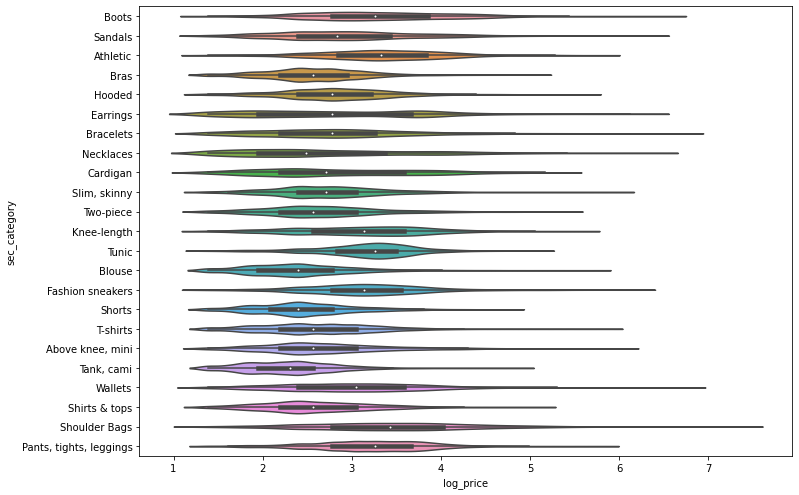

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="log_price", y="sec_category", data=df_train, orient='h', height=10.27)


# Feature - [shipping]

It takes a value of 0 and 1. From analysis from kaggle, 1 indicates that buyer has to pay for shipment

In [ ]:
print("Count of shipping in train \n")
print(df_train['shipping'].value_counts(normalize=True, sort=False))

print("\nCount of shipping in test \n")
print(df_test['shipping'].value_counts(normalize=True, sort=False))

Count of shipping in train 

0    0.624971
1    0.375029
Name: shipping, dtype: float64

Count of shipping in test 

0    0.622511
1    0.377489
Name: shipping, dtype: float64


Analysis of product condition with selling price



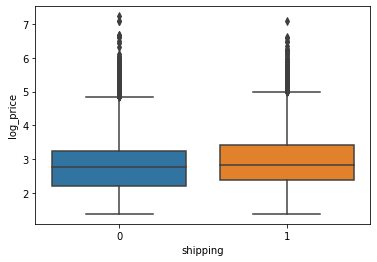

In [ ]:
print("Analysis of product condition with selling price\n")
ax = sns.boxplot(x="shipping", y="log_price", data=df_train)


In [ ]:
df_train[['shipping', 'log_price', 'price']].groupby("shipping").median()

,log_price,price
shipping,,
0,2.772589,15
1,2.833213,16


In [ ]:
df_train_shipment = df_train[df_train["shipping"]==1]
df_train_no_shipment = df_train[df_train["shipping"]==0]

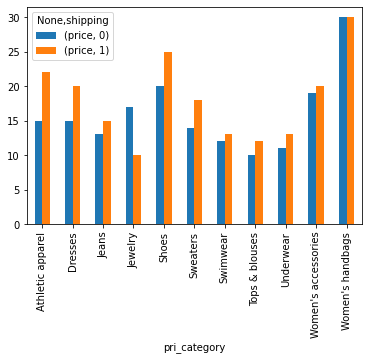

In [ ]:
df_train[
    ['shipping', 'pri_category', 'price']
    ].groupby(
        ["pri_category", "shipping"]
        ).median().unstack().plot.bar()

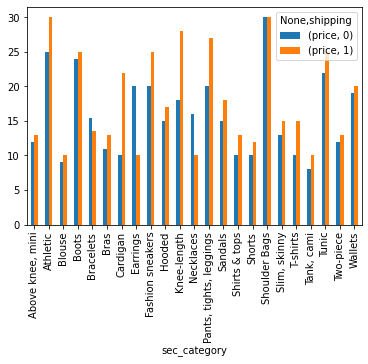

In [ ]:
df_train[
    ['shipping', 'sec_category', 'price']
    ].groupby(
        ["sec_category", "shipping"]
        ).median().unstack().plot.bar()

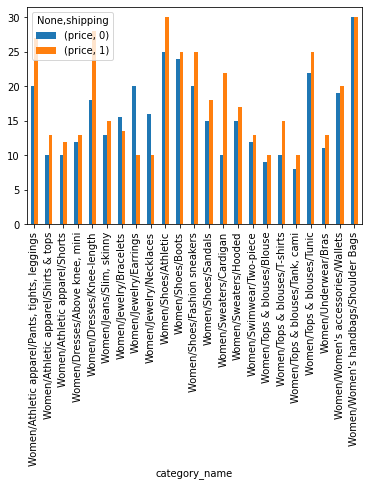

In [ ]:
df_train[
    ['shipping', 'category_name', 'price']
    ].groupby(
        ["category_name", "shipping"]
        ).median().unstack().plot.bar()

# Feature - [ seller_id ]

In [ ]:
print("List of all the seller ids - \n")
df_train['seller_id'].value_counts()

List of all the seller ids - 



1627667960    101
361256493      59
3451350778     52
3854702560     51
3381997        50
             ... 
1941887676      1
6856444614      1
5506710224      1
813275860       1
254984760       1
Name: seller_id, Length: 42161, dtype: int64

Analysis of multiple products & limited products 



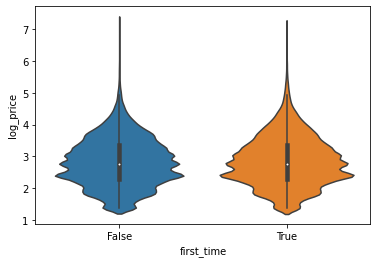

In [ ]:
df_train_seller = df_train
seller_counts = df_train['seller_id'].value_counts().to_dict()
df_train_seller['first_time'] = df_train['seller_id'].apply(lambda x: seller_counts[x]==1)
print("Analysis of multiple products & limited products \n")
ax = sns.violinplot(x="first_time", y="log_price", data=df_train_seller)


In [ ]:
df_train_seller["first_time"].value_counts()

False    38396
True     30004
Name: first_time, dtype: int64

# Feature - [ brand_name ]

- 21465 rows have a missing brand value


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Analysis of products with & without brandnames to their selling price



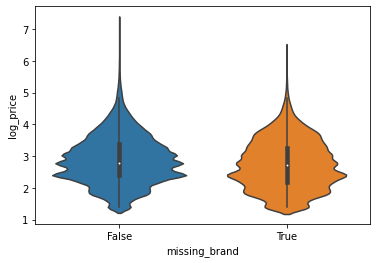

In [ ]:
df_train_brand_name = df_train[['brand_name', 'price', 'log_price']]
df_train_brand_name['missing_brand'] = df_train_brand_name['brand_name'].isna()

print("Analysis of products with & without brandnames to their selling price\n")
ax = sns.violinplot(x="missing_brand", y="log_price", data=df_train_brand_name)


In [ ]:
df_train['brand_name'].value_counts()

PINK                 4617
LuLaRoe              4447
Nike                 3515
Victoria's Secret    3360
FOREVER 21           1729
                     ... 
Alex Marie              1
Ghost                   1
Pendleton               1
Axcess                  1
Coldwater Creek         1
Name: brand_name, Length: 1083, dtype: int64

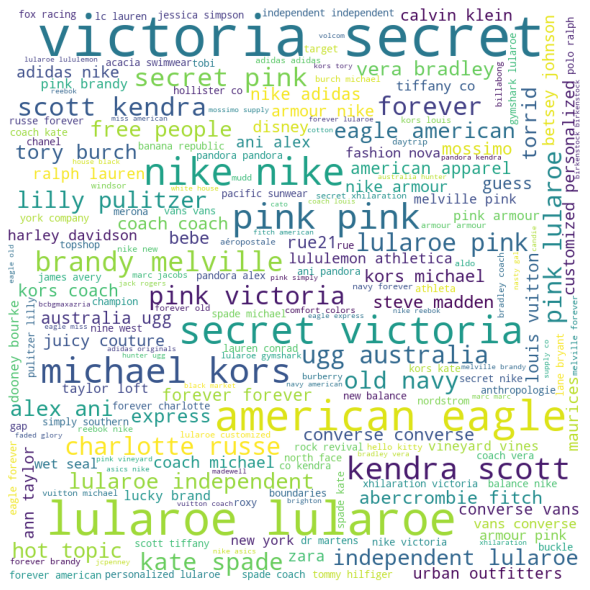

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df_train_brand_name.brand_name:
    val = str(val) 
    if val == "nan":
      continue
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [61]:
vectorizer = CountVectorizer(
    min_df = 5,
    ngram_range=(1,2),
    lowercase=True,
    stop_words = 'english',
    max_features=5000)

df_train_brand_name['brand_name'] = df_train_brand_name['brand_name'].fillna(value="unknown")
X = vectorizer.fit_transform(df_train_brand_name['brand_name'].values.astype('U'))
X_freq = X.toarray().sum(axis=0).tolist()
features = vectorizer.get_feature_names_out().tolist()
record = {x: count  for count, x in zip(X_freq, features)}
record = {k: v for k, v in sorted(record.items(), key=lambda item: item[1], reverse=True)}

print("The 10 most frequent words in the training data")
print(list(record.items())[:10], "\n")

print("The 10 least frequent words in the training data")
print(list(record.items())[-10:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The 10 most frequent words in the training data
[('unknown', 21465), ('pink', 4628), ('lularoe', 4447), ('nike', 3515), ('victoria', 3363), ('secret', 3360), ('victoria secret', 3360), ('american', 1866), ('21', 1729), ('forever', 1729)] 

The 10 least frequent words in the training data
[('tracy', 5), ('tripp', 5), ('tripp nyc', 5), ('tultex', 5), ('von', 5), ('von furstenberg', 5), ('white stag', 5), ('xxi', 5), ('ymi', 5), ('ymi jeans', 5)]


# Feature - [ item_description ]

- 6800 rows of description missing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Analysis of products with & without brandnames to their selling price



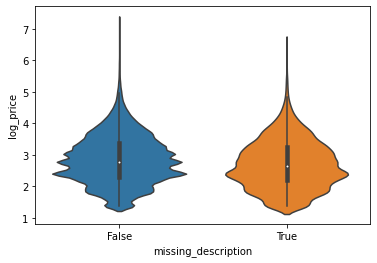

In [69]:
df_train_item_description = df_train[['item_description', 'brand_name', 'price', 'log_price']]
df_train_item_description['missing_description'] = df_train_item_description['item_description'].isna()
df_train_item_description['missing_brand'] = df_train_item_description['brand_name'].isna()
df_train_item_description['missing_both'] = df_train_item_description['missing_brand'] & df_train_item_description['missing_description']
print("Analysis of products with & without brandnames to their selling price\n")
ax = sns.violinplot(x="missing_description", y="log_price", data=df_train_item_description)


Analysing things with missing both values


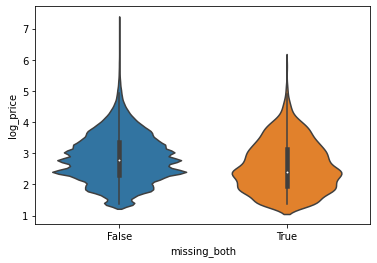

In [73]:
print("Analysing things with missing both values")
ax = sns.violinplot(x="missing_both", y="log_price", data=df_train_item_description)


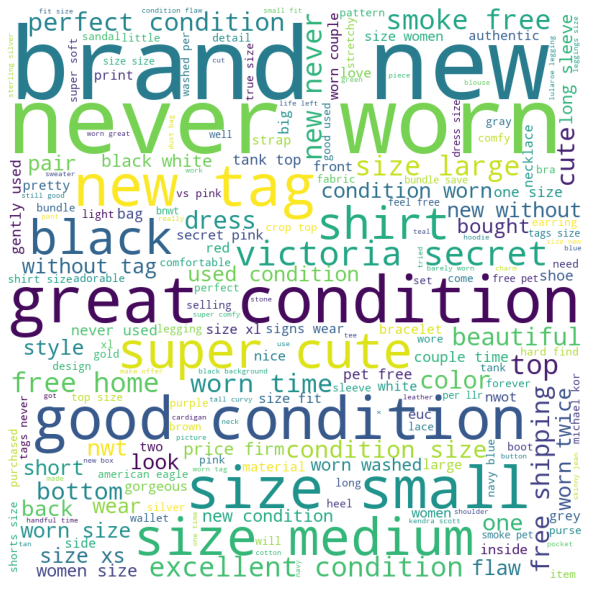

In [74]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df_train_item_description.item_description:
    val = str(val) 
    if val == "nan":
      continue
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [75]:
vectorizer = CountVectorizer(
    min_df = 5,
    ngram_range=(1,2),
    lowercase=True,
    stop_words = 'english',
    max_features=5000)

df_train_item_description['item_description'] = df_train_item_description['item_description'].fillna(value="unknown")
X = vectorizer.fit_transform(df_train_item_description['item_description'].values.astype('U'))
X_freq = X.toarray().sum(axis=0).tolist()
features = vectorizer.get_feature_names_out().tolist()
record = {x: count  for count, x in zip(X_freq, features)}
record = {k: v for k, v in sorted(record.items(), key=lambda item: item[1], reverse=True)}

print("The 10 most frequent words in the training data")
print(list(record.items())[:10], "\n")

print("The 10 least frequent words in the training data")
print(list(record.items())[-10:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The 10 most frequent words in the training data
[('size', 21937), ('worn', 15833), ('new', 14335), ('condition', 12655), ('brand', 7526), ('black', 6892), ('unknown', 6818), ('small', 6703), ('brand new', 6474), ('great', 6229)] 

The 10 least frequent words in the training data
[('think wore', 17), ('tigers', 17), ('tights size', 17), ('twist', 17), ('used little', 17), ('valentines', 17), ('varsity', 17), ('worn purple', 17), ('worn rips', 17), ('worn shirt', 17)]
